In [126]:
# raise Exception("Expect more errors down the line! Fill the missing code to get to a df that looks like the one in readme.md")

## Imports and fetching data

In [127]:
import pandas as pd
import numpy as np
import re

In [128]:
# Fetching data.
df = pd.read_csv("titanic.csv")

## Exploring data

In [129]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Fixing age as Int

In [131]:
# chekcing NaN for age

ageNa = df['Age'].isnull().sum()

print(f"Ammount of Nan Values in Age Series: {ageNa}")

Ammount of Nan Values in Age Series: 263


In [132]:
# filling age-column that contains NaN with -1
df["Age"] = df['Age'].fillna(-1)

# casting type - changes datatype 'Age' from float to int. 
df["Age"] = df['Age'].astype(float).astype(int)

In [133]:
# Checking that fillna worked.
ageNa = df['Age'].isnull().sum()
# Should give us 0.
print(f"Ammount of Nan Values in Age Series after fillna: {ageNa}")

Ammount of Nan Values in Age Series after fillna: 0


In [134]:
# Confirming that the typecast worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   int32  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 107.5+ KB


# Feature engineering text data

In [135]:
# Casting name to lowercase to make text easier to work with

df["Name"] = df["Name"].apply(lambda x: x.lower())

In [136]:
def title_extractor(name: str) -> str:
    title = re.search(" [a-z]*\.", name).group(0)
    title = re.sub("\.", "", title)
    return title

In [137]:
# checks if the casting went well.
df["Name"]

0                                 braund, mr. owen harris
1       cumings, mrs. john bradley (florence briggs th...
2                                  heikkinen, miss. laina
3            futrelle, mrs. jacques heath (lily may peel)
4                                allen, mr. william henry
                              ...                        
1304                                   spector, mr. woolf
1305                         oliva y ocana, dona. fermina
1306                         saether, mr. simon sivertsen
1307                                  ware, mr. frederick
1308                             peter, master. michael j
Name: Name, Length: 1309, dtype: object

In [138]:
df["Title"] = df["Name"].apply(title_extractor)

In [139]:
df["Title"].value_counts()

 mr          757
 miss        260
 mrs         197
 master       61
 rev           8
 dr            8
 col           4
 mlle          2
 major         2
 ms            2
 lady          1
 sir           1
 mme           1
 don           1
 capt          1
 countess      1
 jonkheer      1
 dona          1
Name: Title, dtype: int64

## First Name extraction

In [140]:
def first_name_extractor(name: str) -> str:
    first_name = re.search(r"^[a-z]*\,", name)
    
    try:
        first_name = first_name.group(0)
        first_name = re.sub(r"\,", "", first_name)
    except:
        first_name = "Undefined"

    return first_name

In [141]:
def last_name_extractor(name: str) -> str:
    last_name = re.search(r"\. [a-z]*", name)
    
    try:
        last_name = last_name.group(0)
        last_name = re.sub(r"^\. ", "", last_name)
    except:
        last_name = "Undefined"

    return last_name

In [142]:
# Making a column names First name using the function first_name_extractor.
df["First Name"] = df["Name"].apply(first_name_extractor)

In [143]:
# Making a column names Last name using the function last_name_extractor.
df["Last Name"] = df["Name"].apply(last_name_extractor)

# Making ordinal categories for age (usefull for classification later on)

In [144]:
def age_to_ordinal(age: int) -> int:
    if age < 26:
        return 1
    if 26 <= age < 40:
        return 2
    if 40 <= age < 60:
        return 3
    if 60 <= age < 70:
        return 4
    if age >= 70:
        return 5

In [145]:
df["Age Category"] = df["Age"].apply(age_to_ordinal)

In [146]:
# Just looking at age categorie to see effect
df["Age Category"].value_counts()

1    706
2    358
3    205
4     32
5      8
Name: Age Category, dtype: int64

<AxesSubplot:>

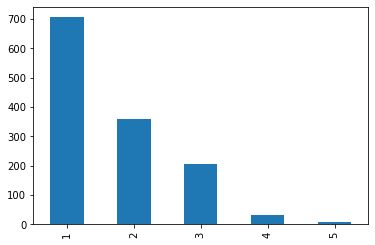

In [147]:
# Fancy bonus plot if you want to
df["Age Category"].value_counts().plot(kind="bar")

In [148]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,First Name,Last Name,Age Category
0,1,3,"braund, mr. owen harris",male,22,1,0,A/5 21171,7.2500,NaN,S,mr,braund,owen,1
1,2,1,"cumings, mrs. john bradley (florence briggs th...",female,38,1,0,PC 17599,71.2833,C85,C,mrs,cumings,john,2
2,3,3,"heikkinen, miss. laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,heikkinen,laina,2
3,4,1,"futrelle, mrs. jacques heath (lily may peel)",female,35,1,0,113803,53.1000,C123,S,mrs,futrelle,jacques,2
4,5,3,"allen, mr. william henry",male,35,0,0,373450,8.0500,NaN,S,mr,allen,william,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"spector, mr. woolf",male,-1,0,0,A.5. 3236,8.0500,NaN,S,mr,spector,woolf,1
1305,1306,1,"oliva y ocana, dona. fermina",female,39,0,0,PC 17758,108.9000,C105,C,dona,Undefined,fermina,2
1306,1307,3,"saether, mr. simon sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,mr,saether,simon,2
1307,1308,3,"ware, mr. frederick",male,-1,0,0,359309,8.0500,NaN,S,mr,ware,frederick,1


## Dealing with rest of NaN
Since ish 80% of cabin is nan, it is doesn't make sense to drop it, thusly just filling rest of dataframe with Undefined for NaN values, however do not do this to deal with NaN in numerical columns (Series in panda language) as this would change the datatype (then you could use -1 instead as shown above)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Name          1309 non-null   object 
 3   Sex           1309 non-null   object 
 4   Age           1309 non-null   int32  
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1308 non-null   float64
 9   Cabin         295 non-null    object 
 10  Embarked      1307 non-null   object 
 11  Title         1309 non-null   object 
 12  First Name    1309 non-null   object 
 13  Last Name     1309 non-null   object 
 14  Age Category  1309 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(8)
memory usage: 148.4+ KB


In [153]:
# Filling Fare NaN float value of -1.0
df["Fare"]  = df['Fare'].fillna(-1)

# Filling NaN in the two remaining string columngs (thought this hits entire df)
df = df.fillna("Undefined")

In [151]:
df.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin           1014
Embarked           2
Title              0
First Name         0
Last Name          0
Age Category       0
dtype: int64

In [155]:
# Just to check is the task is solved, and I can compare to the table in 
# the task.
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,First Name,Last Name,Age Category
0,1,3,"braund, mr. owen harris",male,22,1,0,A/5 21171,7.2500,Undefined,S,mr,braund,owen,1
1,2,1,"cumings, mrs. john bradley (florence briggs th...",female,38,1,0,PC 17599,71.2833,C85,C,mrs,cumings,john,2
2,3,3,"heikkinen, miss. laina",female,26,0,0,STON/O2. 3101282,7.9250,Undefined,S,miss,heikkinen,laina,2
3,4,1,"futrelle, mrs. jacques heath (lily may peel)",female,35,1,0,113803,53.1000,C123,S,mrs,futrelle,jacques,2
4,5,3,"allen, mr. william henry",male,35,0,0,373450,8.0500,Undefined,S,mr,allen,william,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"spector, mr. woolf",male,-1,0,0,A.5. 3236,8.0500,Undefined,S,mr,spector,woolf,1
1305,1306,1,"oliva y ocana, dona. fermina",female,39,0,0,PC 17758,108.9000,C105,C,dona,Undefined,fermina,2
1306,1307,3,"saether, mr. simon sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,Undefined,S,mr,saether,simon,2
1307,1308,3,"ware, mr. frederick",male,-1,0,0,359309,8.0500,Undefined,S,mr,ware,frederick,1
